# One-vs-all Classification with Logisitic Regression

week04のMulti-class Classificationの課題について

In [1]:
import math
import numpy as np
from scipy import optimize
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)   # 図を大きく表示

## Dataset

In [4]:
dataset = loadmat('ex3data1.mat')
X = dataset['X']
y = dataset['y']

X.shape, y.shape

((5000, 400), (5000, 1))

## Visualizing the data

In [5]:
def display_data(images, labels, indexes):
    m = len(indexes)
    rows = math.floor(math.sqrt(m))
    columns = math.ceil(m / rows)

    fig = plt.figure()
    fig.subplots_adjust(hspace=0.7)

    for row in range(rows):
        for col in range(columns):
            i = row * columns + col
            if i >= m: break
            index = indexes[i];
            ax = fig.add_subplot(rows, columns, i+1)
            ax.axis('off')
            ax.set_title(labels[index])
            ax.imshow(images[index].reshape(20,20).T, cmap = plt.get_cmap('gray'))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


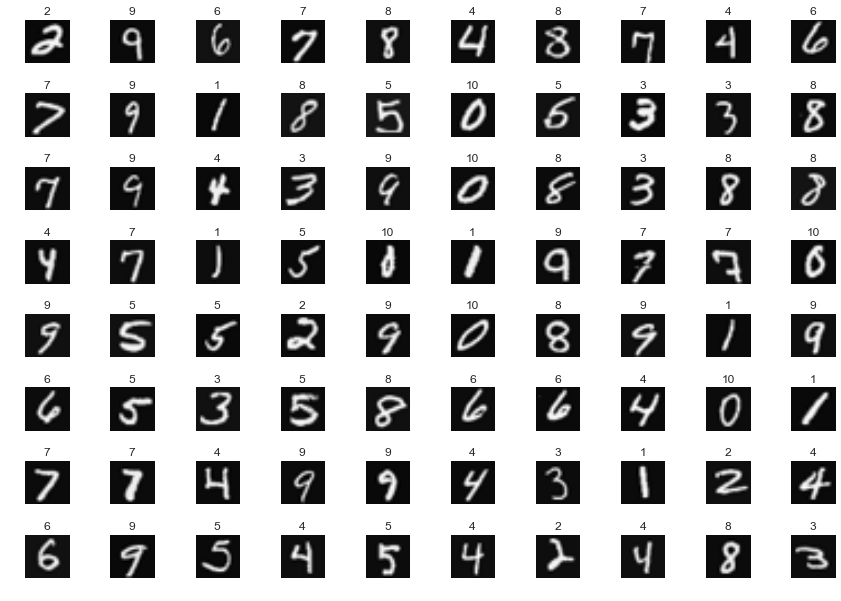

In [6]:
labels = y.ravel().tolist()
indexes = np.random.randint(0, len(labels), (80, 1))
display_data(X, labels, indexes)
plt.savefig('week04_dataset.png')

## Classification

In [7]:
%run 'lr_classifier.py'

In [8]:
thetas = optimize_thetas(X, y, 10, 0.1)

training : label 1 ...
training : label 2 ...
training : label 3 ...
training : label 4 ...
training : label 5 ...
training : label 6 ...
training : label 7 ...
training : label 8 ...
training : label 9 ...
training : label 10 ...


## Prediction

In [9]:
preds = predict(thetas, X)
pred_classes = np.array([p['class'] for p in preds]).reshape(len(preds), 1)
compute_train_accuracy(pred_classes, y)

93.280000000000001

## Visualize prediction errors

In [10]:
corrects = (np.where(pred_classes == y))[0]
mistakes = (np.where(pred_classes != y))[0]

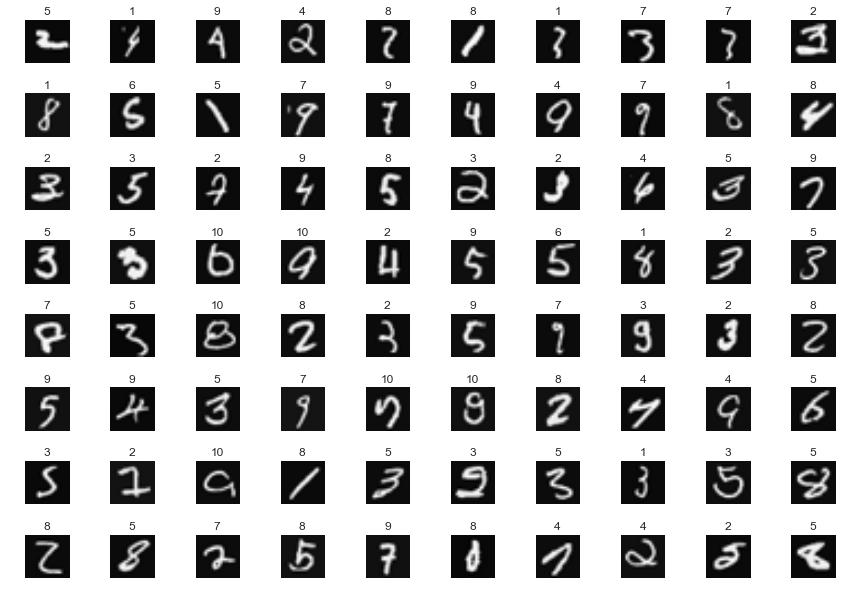

In [11]:
labels = pred_classes.ravel().tolist()
display_data(X, labels, np.random.permutation(mistakes)[0:80])
plt.savefig('week04_lr_mistakes.png')

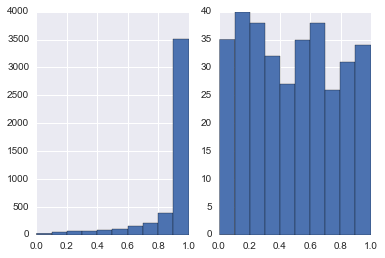

In [13]:
df = pd.DataFrame(data=preds)

plt.rcParams['figure.figsize'] = (6.0, 4.0)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(df.ix[corrects].value)
ax = fig.add_subplot(1,2,2)
ax.hist(df.ix[mistakes].value)
plt.savefig('week04_lr_pred_hist.png')